In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Para graficar fechas
import seaborn as sns
import math # Para logaritmos
import os # Para cambiar directorios para los que trabajen de forma local en sus computadoras
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter # Filtro HP
from datetime import datetime
from sklearn.model_selection import train_test_split


Importamos los datos

In [3]:
df = pd.read_excel('deflactacion_corrientes.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.set_index('fecha',inplace=True)
df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,articulos_limpieza_perfumeria,indumentaria_calzado_textiles_hogar,electronica_hogar,otros
fecha,,,,,,,,,,,,,,
2017-01-01,5,18,414425.891532,55223.974281,93280.928771,19161.332555,31799.710020,52424.653122,16475.949863,13889.575699,53520.859732,11313.453598,27207.559535,39662.069641
2017-02-01,5,18,393554.096105,52277.269334,95111.702479,18678.892501,31539.134417,51979.759497,16524.547555,12775.205734,49428.093109,10054.448362,21156.316372,33553.135218
2017-03-01,5,18,400771.343548,52853.428861,101066.125407,19780.977190,32512.803226,52554.654599,17230.403306,13257.757888,51250.270276,9989.440218,21353.425573,30834.407452
2017-04-01,5,18,411524.235066,50280.324673,110553.618925,21049.554431,31650.966236,54256.122579,15848.447058,13309.966144,51006.932402,12887.983707,23611.241162,29449.348475
2017-05-01,5,18,390927.496548,42314.297385,100641.902610,19761.425514,29896.167973,49624.114859,14179.877376,12517.987065,48910.206875,14040.949159,30447.033033,29814.816273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.475501,73596.567287,66509.406720,12378.019968,24954.736410,39250.820739,10924.852004,6873.979949,40024.131157,10900.049144,17093.067560,33760.414154
2024-01-01,5,18,282017.922783,46319.147132,52891.972571,10320.213678,23494.183008,28671.613084,10017.838724,5261.152254,34081.619661,6414.874133,12361.931826,24635.877263
2024-02-01,5,18,259887.036689,40663.266321,51263.344643,9717.900665,20869.634644,28810.387901,9996.009597,4865.157902,30093.036106,4932.400807,11456.422642,22770.221265


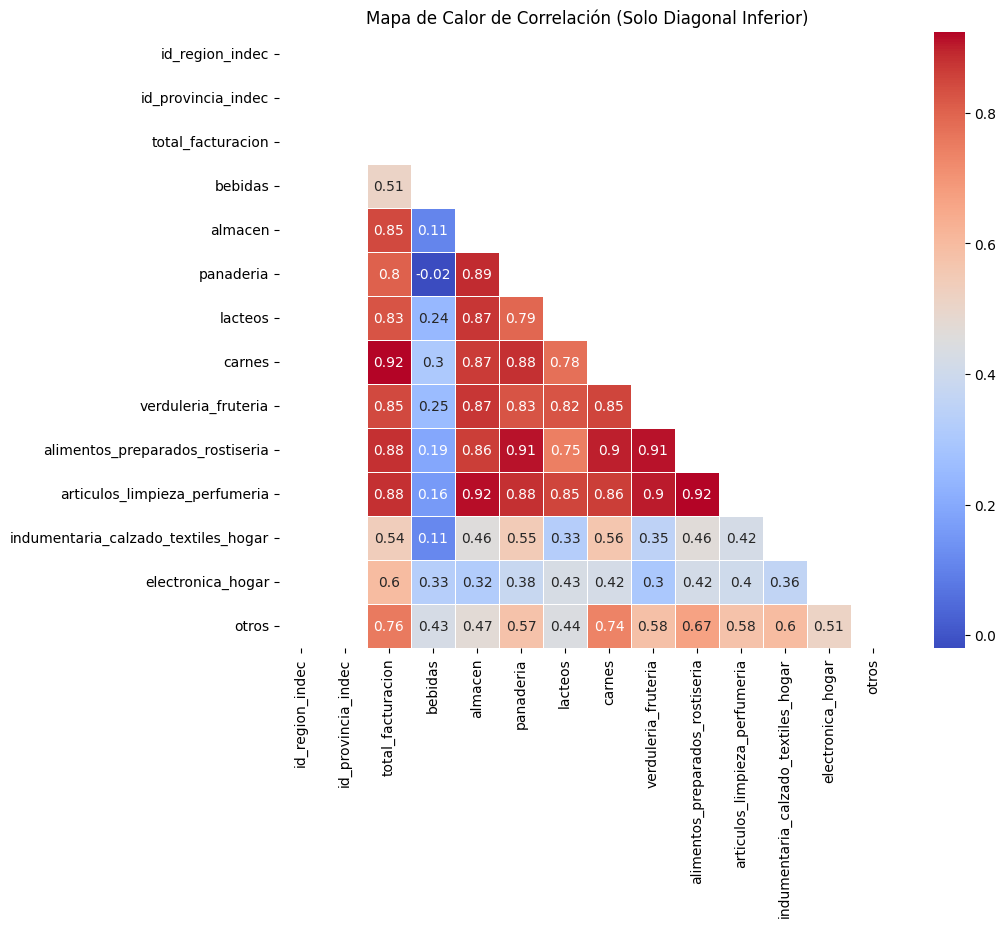

In [4]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear una máscara para la parte superior de la matriz de correlación
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Mapa de Calor de Correlación (Solo Diagonal Inferior)')
plt.show()

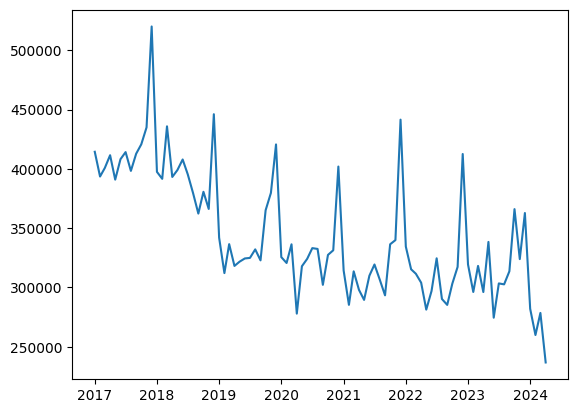

In [5]:
plt.plot(df['total_facturacion'])

Generamos una serie secuencial para añadir una tendencia, es un tipo de indice

In [6]:
df['tendencia'] = np.arange(1,len(df)+1)

Creamos un modelo lineal teniendo en cuenta solo esta variable "tendencia"

In [7]:
X = df['tendencia']
X = sm.add_constant(X)

Y = df['total_facturacion']
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     79.68
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           6.95e-14
Time:                        16:06:52   Log-Likelihood:                -1050.9
No. Observations:                  88   AIC:                             2106.
Df Residuals:                      86   BIC:                             2111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.071e+05   8086.169     50.340      0.0

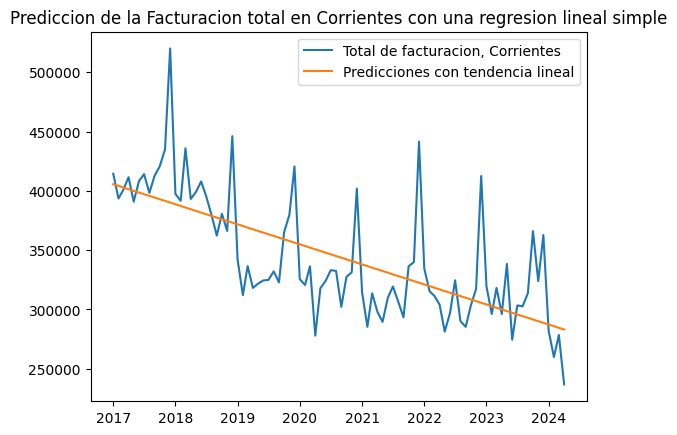

In [8]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal")
plt.title("Prediccion de la Facturacion total en Corrientes con una regresion lineal simple")
plt.legend()
plt.show()

Probando lo mismo, pero con una tendencia cuadratica

In [9]:
df['tend_cuadratica'] = df['tendencia'] ** 2
df['tend_cuadratica']

fecha
2017-01-01       1
2017-02-01       4
2017-03-01       9
2017-04-01      16
2017-05-01      25
              ... 
2023-12-01    7056
2024-01-01    7225
2024-02-01    7396
2024-03-01    7569
2024-04-01    7744
Name: tend_cuadratica, Length: 88, dtype: int64

In [10]:
X = df[['tendencia','tend_cuadratica']]
X = sm.add_constant(X)

Y = df['total_facturacion']
reg_ten1 = sm.OLS(Y,X).fit()
print(reg_ten1.summary())
predicciones = reg_ten1.predict(X)

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     47.55
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.39e-14
Time:                        16:06:52   Log-Likelihood:                -1046.7
No. Observations:                  88   AIC:                             2099.
Df Residuals:                      85   BIC:                             2107.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             4.33e+05   1.18e+04     

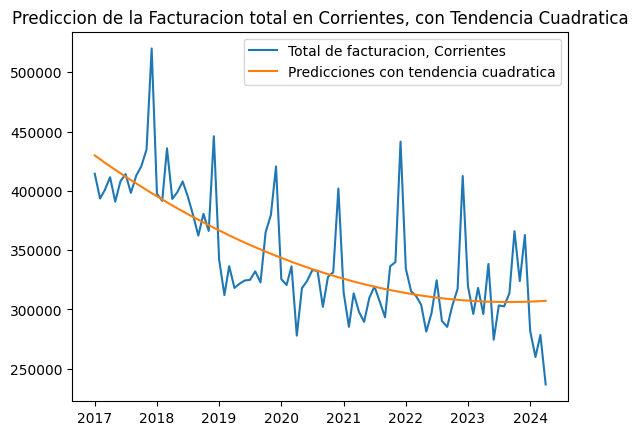

In [11]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia cuadratica")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia Cuadratica")
plt.legend()
plt.show()

Probando con medias moviles

In [12]:
df['mv_6'] = df['total_facturacion'].rolling(6).mean()

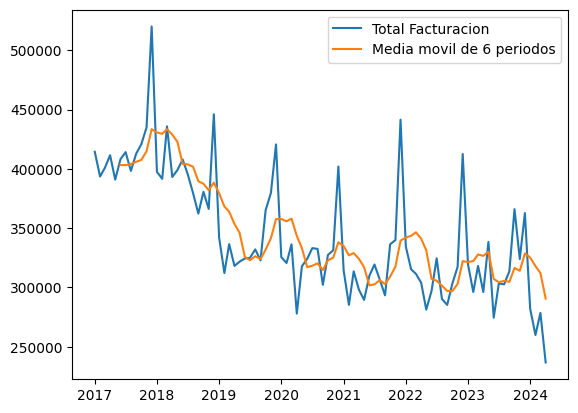

In [13]:
plt.plot(df['total_facturacion'],label = "Total Facturacion")
plt.plot(df['mv_6'],label = "Media movil de 6 periodos")
plt.legend()
plt.show()

<h3> Capturamos la estacionalidad </h3>
<p> Buscamos capturar la estacionalidad del conjunto de datos usando variables binarias para marcar mejores los meses </p>
<p> Para ello creamos una dummie binaria que marque los meses </p>

In [14]:
df['mes'] = df.index.month #--> 1. Tomamos los meses

#2. Lo que hace esto es: 
# Genera la dummie, tomando el DF como conjunto de datos, la columna 'meses' para generar la dummie
# y eliminamos el primer elemento para evitar la multicolinealidad. Por ultimo declaramos que sea numerica
# la variable binaria (trabajamos con 0 y 1).
df = pd.get_dummies(df,columns=['mes'], drop_first=True, dtype=int)
df

,id_region_indec,id_provincia_indec,total_facturacion,bebidas,almacen,panaderia,lacteos,carnes,verduleria_fruteria,alimentos_preparados_rostiseria,...,mes_3,mes_4,mes_5,mes_6,mes_7,mes_8,mes_9,mes_10,mes_11,mes_12
fecha,,,,,,,,,,,,,,,,,,,,,
2017-01-01,5,18,414425.891532,55223.974281,93280.928771,19161.332555,31799.710020,52424.653122,16475.949863,13889.575699,...,0,0,0,0,0,0,0,0,0,0
2017-02-01,5,18,393554.096105,52277.269334,95111.702479,18678.892501,31539.134417,51979.759497,16524.547555,12775.205734,...,0,0,0,0,0,0,0,0,0,0
2017-03-01,5,18,400771.343548,52853.428861,101066.125407,19780.977190,32512.803226,52554.654599,17230.403306,13257.757888,...,1,0,0,0,0,0,0,0,0,0
2017-04-01,5,18,411524.235066,50280.324673,110553.618925,21049.554431,31650.966236,54256.122579,15848.447058,13309.966144,...,0,1,0,0,0,0,0,0,0,0
2017-05-01,5,18,390927.496548,42314.297385,100641.902610,19761.425514,29896.167973,49624.114859,14179.877376,12517.987065,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,5,18,362776.475501,73596.567287,66509.406720,12378.019968,24954.736410,39250.820739,10924.852004,6873.979949,...,0,0,0,0,0,0,0,0,0,1
2024-01-01,5,18,282017.922783,46319.147132,52891.972571,10320.213678,23494.183008,28671.613084,10017.838724,5261.152254,...,0,0,0,0,0,0,0,0,0,0
2024-02-01,5,18,259887.036689,40663.266321,51263.344643,9717.900665,20869.634644,28810.387901,9996.009597,4865.157902,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X = df[['tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df['total_facturacion']

reg_tend_estac = sm.OLS(y,X).fit()
reg_tend_estac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     25.19
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.50e-21
Time:                        16:06:53   Log-Likelihood:                -1008.7
No. Observations:                  88   AIC:                             2043.
Df Residuals:                      75   BIC:                             2076.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.041e+05   9897.106     40.832      0.000    3.84e+05    4.24e+05
tendencia  -1462.9561    104.880    -13.949      0.000   -1671.887   -1254.025
mes_2      -1.792e+04   1.25e+04     -1.438      0.155   -4.27e+04    6904.270
mes_3       3138.0256   1.25e+04      0.252      0.802   -2.17e+04     2.8e+04
mes_4      -1.986e+04   1.25e+04     -1.594      0.115   -4.47e+04    4964.948
mes_5      -1.003e+04   1.29e+04     -0.778      0.439   -3.57e+04    1.57e+04
mes_6      -7518.8384   1.29e+04     -0.583      0.562   -3.32e+04    1.82e+04
mes_7       3781.6042   1.29e+04      0.293      0.770   -2.19e+04    2.95e+04
mes_8      -5173.5587   1.29e+04     -0.401      0.689   -3.09e+04    2.05e+04
mes_9      -1.079e+04   1.29e+04     -0.837      0.405   -3.65e+04    1.49e+04
mes_10      2.027e+04   1.29e+04      1.571      0.120   -5429.661     4.6e+04
mes_11      2.085e+04   1.29e+04      1.616      0.110   -4857.784    4.66e+04
mes_12      9.548e+04   1.29e+04      7.397      0.000    6.98e+04    1.21e+05
==============================================================================
Omnibus:                        3.195   Durbin-Watson:                   0.600
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                3.135
Skew:                           0.415   Prob(JB):                        0.209
Kurtosis:                       2.593   Cond. No.                         613.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
#Generamos predicciones
predicciones = reg_tend_estac.predict(X)

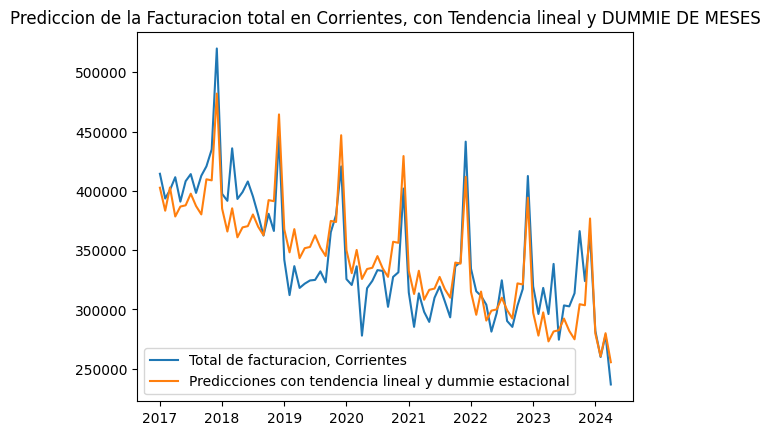

In [17]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h3> Inclusion de resagos (lags) </h3>


In [18]:
df['ventas_lag'] = df['total_facturacion'].shift(1)

In [19]:
X = df.dropna(subset=['ventas_lag'])[['ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df.dropna(subset=['ventas_lag'])['total_facturacion']

reg_tend_estac_lag = sm.OLS(y,X).fit()
predicciones = reg_tend_estac_lag.predict(X)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     48.66
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           1.32e-30
Time:                        16:06:53   Log-Likelihood:                -968.39
No. Observations:                  87   AIC:                             1965.
Df Residuals:                      73   BIC:                             1999.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.126e+04   4.27e+04      1.200      0.234   -3.38e+04    1.36e+05
ventas_lag     0.7010      0.084      8.353      0.000       0.534       0.868
tendencia   -438.6550    143.890     -3.049      0.003    -725.427    -151.883
mes_2       5.069e+04   1.23e+04      4.121      0.000    2.62e+04    7.52e+04
mes_3        8.43e+04   1.33e+04      6.326      0.000    5.77e+04    1.11e+05
mes_4       4.654e+04   1.21e+04      3.838      0.000    2.24e+04    7.07e+04
mes_5       7.061e+04   1.35e+04      5.228      0.000    4.37e+04    9.75e+04
mes_6       6.811e+04   1.31e+04      5.203      0.000     4.2e+04    9.42e+04
mes_7       7.765e+04   1.29e+04      5.998      0.000    5.19e+04    1.03e+05
mes_8       6.078e+04   1.23e+04      4.928      0.000    3.62e+04    8.54e+04
mes_9       6.144e+04   1.28e+04      4.795      0.000    3.59e+04     8.7e+04
mes_10      9.644e+04   1.31e+04      7.346      0.000    7.03e+04    1.23e+05
mes_11      7.525e+04   1.15e+04      6.532      0.000    5.23e+04    9.82e+04
mes_12      1.495e+05   1.15e+04     13.006      0.000    1.27e+05    1.72e+05
==============================================================================
Omnibus:                        0.582   Durbin-Watson:                   2.318
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.179
Skew:                          -0.008   Prob(JB):                        0.915
Kurtosis:                       3.221   Cond. No.                     9.71e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

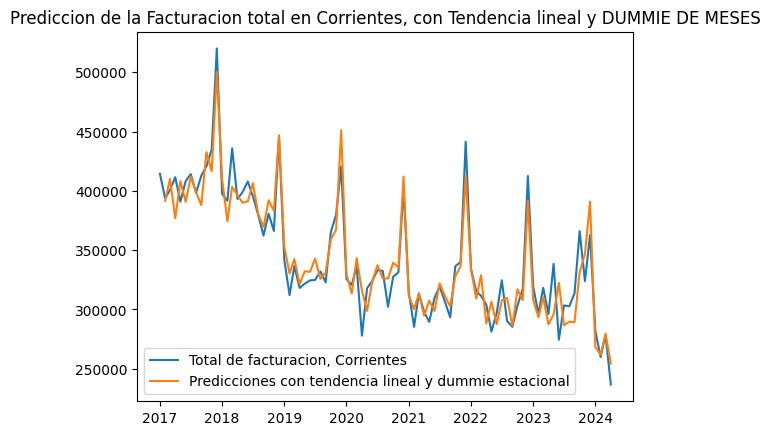

In [20]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes, con Tendencia lineal y DUMMIE DE MESES")
plt.legend()
plt.show()

<h3> Influencia del COVID </h3>
<p> Agregamos una binaria para ver como afecto a las ventas el virus COVID. </p>
<p> Consideramos:</p>
<p> Fecha de inicio: 11 de Marzo 2020 - Declara la OMS</p>
<p> Fecha de "fin": Diciembre 2022 - Idea general</p>


In [21]:
df['covid'] = ((df.index >= datetime(2020,3,11)) & (df.index <= datetime(2022,12,30))).astype(int)

In [71]:
X = df.dropna(subset=['ventas_lag'])[['covid','ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
y = df.dropna(subset=['ventas_lag'])['total_facturacion']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, shuffle=False)

In [72]:

reg_tend_estac_lag = sm.OLS(y_train,X_train).fit()
predicciones = reg_tend_estac_lag.predict(X_test)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     39.82
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           6.13e-27
Time:                        17:15:30   Log-Likelihood:                -911.34
No. Observations:                  82   AIC:                             1853.
Df Residuals:                      67   BIC:                             1889.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.117e+04   4.68e+04      1.308      0.195   -3.22e+04    1.55e+05
covid      -6440.7099   5028.017     -1.281      0.205   -1.65e+04    3595.254
ventas_lag     0.6727      0.092      7.320      0.000       0.489       0.856
tendencia   -382.1788    148.482     -2.574      0.012    -678.549     -85.808
mes_2       5.067e+04   1.35e+04      3.764      0.000    2.38e+04    7.75e+04
mes_3       8.355e+04   1.46e+04      5.723      0.000    5.44e+04    1.13e+05
mes_4       4.959e+04   1.31e+04      3.790      0.000    2.35e+04    7.57e+04
mes_5       7.045e+04   1.44e+04      4.898      0.000    4.17e+04    9.92e+04
mes_6       6.806e+04   1.39e+04      4.885      0.000    4.02e+04    9.59e+04
mes_7       7.757e+04   1.38e+04      5.627      0.000    5.01e+04    1.05e+05
mes_8       6.092e+04   1.31e+04      4.649      0.000    3.48e+04    8.71e+04
mes_9       6.123e+04   1.37e+04      4.481      0.000     3.4e+04    8.85e+04
mes_10      9.597e+04    1.4e+04      6.837      0.000     6.8e+04    1.24e+05
mes_11      7.556e+04   1.22e+04      6.185      0.000    5.12e+04    9.99e+04
mes_12      1.553e+05   1.26e+04     12.375      0.000     1.3e+05     1.8e+05
==============================================================================
Omnibus:                        3.003   Durbin-Watson:                   2.338
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.327
Skew:                          -0.277   Prob(JB):                        0.312
Kurtosis:                       3.612   Cond. No.                     1.04e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

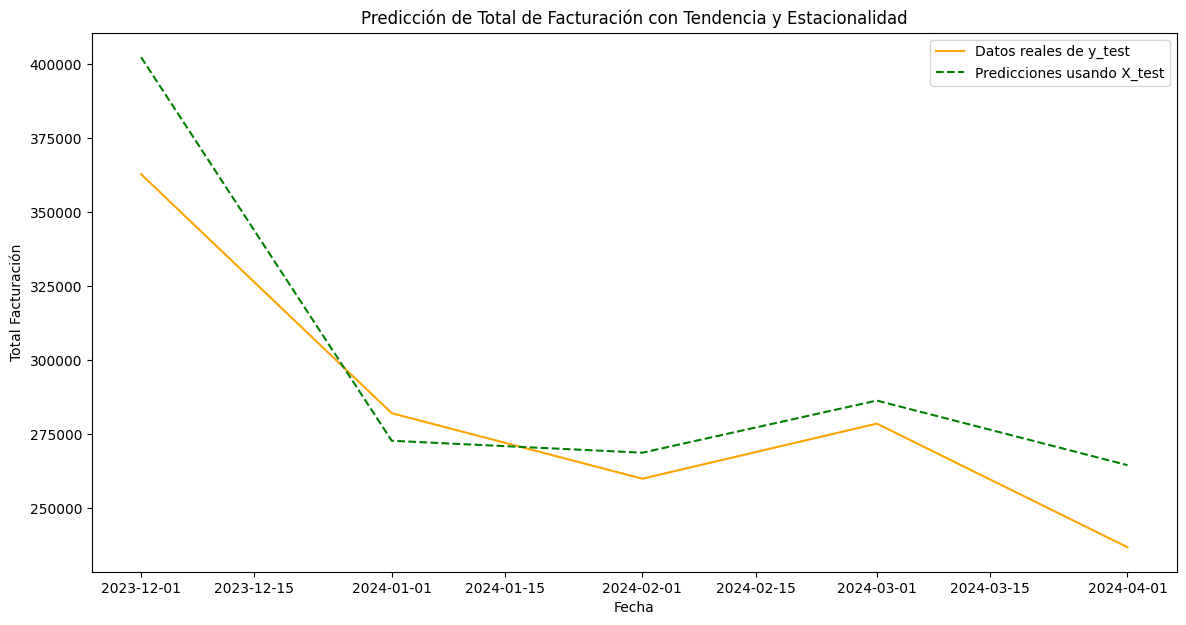

In [73]:
# Graficar los resultados del modelo inicial
plt.figure(figsize=(14, 7))
plt.plot(X_test.index, y_test, label='Datos reales de y_test', color='orange')
plt.plot(X_test.index, predicciones, label='Predicciones usando X_test', color='green', linestyle='--')
plt.title('Predicción de Total de Facturación con Tendencia y Estacionalidad')
plt.xlabel('Fecha')
plt.ylabel('Total Facturación')
plt.legend()
plt.show()

<h3> Entrenamiento del modelo usando todos los datos </h3>


In [79]:
# Incorporar los datos de prueba al conjunto de entrenamiento
X_train_full = pd.concat([X_train, X_test])
y_train_full = pd.concat([y_train, y_test])

# Reentrenar el modelo de regresión lineal con todos los datos
reg_tend_estac_lag_full = sm.OLS(y_train_full, X_train_full).fit()
print(reg_tend_estac_lag_full.summary())

                            OLS Regression Results                            
Dep. Variable:      total_facturacion   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     44.99
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           7.00e-30
Time:                        17:33:36   Log-Likelihood:                -968.02
No. Observations:                  87   AIC:                             1966.
Df Residuals:                      72   BIC:                             2003.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.437e+04    4.6e+04      1.400      0.1

IMPORTANTE: Generaremos los datos necesarios para hacer la prediccion de mayo. Lo validaremos cuando salga el dato real

In [86]:
# Crear una nueva fila con las características especificadas
nueva_fila = {
    'const': 1,  # constante
    'covid': 0, 
    'ventas_lag': y_train_full.values[-1],
    'tendencia': X_train_full['tendencia'].max() + 1,  # tendencia es la última tendencia más 1
    'Mes_2': 0,
    'Mes_3': 0,
    'Mes_4': 0,
    'Mes_5': 1,  # Mes de mayo
    'Mes_6': 0,
    'Mes_7': 0,
    'Mes_8': 0,
    'Mes_9': 0,
    'Mes_10': 0,
    'Mes_11': 0,
    'Mes_12': 0
}

# Convertir la nueva fila en un DataFrame
nueva_fila_df = pd.DataFrame([nueva_fila], index=[df.index[-1] + pd.DateOffset(months=1)])

reg_tend_estac_lag_full.predict(nueva_fila_df)

2024-05-01    252102.11478
dtype: float64

Vamos a incluir los datos del IPC y ver como influyen en la regresion

In [32]:
datos_ipc = pd.read_excel('ipc_segmentacion_nea.xlsx')

#Rescatamos la fecha maxima y minima del supermercado para recortar los datos del IPC
fecha_min = min(df.index)
fecha_max = max(df.index)

valores_para_super = datos_ipc[(datos_ipc['id_categoria'] == 1) & (datos_ipc['id_division'] == 1) & (datos_ipc['id_subdivision'] == 1)]
valores_para_super = valores_para_super.set_index('fecha')
valores_para_super = valores_para_super[(valores_para_super.index >= fecha_min) & (valores_para_super.index <= fecha_max)]
valores_para_super

,Unnamed: 0,id_region,id_categoria,id_division,id_subdivision,valor
fecha,,,,,,
2017-01-01,1,5,1,1,1,101.6727
2017-02-01,2,5,1,1,1,103.4617
2017-03-01,3,5,1,1,1,105.9880
2017-04-01,4,5,1,1,1,108.3473
2017-05-01,5,5,1,1,1,110.4331
...,...,...,...,...,...,...
2023-12-01,84,5,1,1,1,3795.5250
2024-01-01,85,5,1,1,1,4535.8005
2024-02-01,86,5,1,1,1,5030.0152


Anexamos la columna valor al conjunto de datos del supermercado

In [33]:
df['ipc_general'] = valores_para_super['valor']

Creamos de nuevo el modelo para probar su eficiencia

In [37]:
X = df.dropna(subset=['ventas_lag'])[['ipc_general','covid','ventas_lag','tendencia','mes_2','mes_3','mes_4','mes_5','mes_6','mes_7','mes_8','mes_9','mes_10','mes_11','mes_12']]
X = sm.add_constant(X)
y = df.dropna(subset=['ventas_lag'])['total_facturacion']
reg_tend_estac_lag = sm.OLS(y,X).fit()
predicciones = reg_tend_estac_lag.predict(X)
reg_tend_estac_lag.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      total_facturacion   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     41.70
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           3.87e-29
Time:                        16:40:13   Log-Likelihood:                -967.75
No. Observations:                  87   AIC:                             1967.
Df Residuals:                      71   BIC:                             2007.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         6.23e+04   4.63e+04      1.347      0.182   -2.99e+04    1.55e+05
ipc_general    -2.0366      3.048     -0.668      0.506      -8.115       4.042
covid       -5823.7542   5704.299     -1.021      0.311   -1.72e+04    5550.294
ventas_lag      0.6759      0.091      7.419      0.000       0.494       0.858
tendencia    -366.0235    195.141     -1.876      0.065    -755.123      23.076
mes_2        4.855e+04   1.28e+04      3.788      0.000     2.3e+04    7.41e+04
mes_3        8.179e+04    1.4e+04      5.845      0.000    5.39e+04     1.1e+05
mes_4        4.531e+04   1.25e+04      3.611      0.001    2.03e+04    7.03e+04
mes_5        6.841e+04   1.39e+04      4.920      0.000    4.07e+04    9.61e+04
mes_6        6.604e+04   1.35e+04      4.909      0.000    3.92e+04    9.29e+04
mes_7        7.559e+04   1.33e+04      5.684      0.000    4.91e+04    1.02e+05
mes_8          5.9e+04   1.26e+04      4.673      0.000    3.38e+04    8.42e+04
mes_9        5.944e+04   1.32e+04      4.515      0.000    3.32e+04    8.57e+04
mes_10       9.428e+04   1.35e+04      6.973      0.000    6.73e+04    1.21e+05
mes_11       7.388e+04   1.17e+04      6.294      0.000    5.05e+04    9.73e+04
mes_12       1.483e+05   1.17e+04     12.653      0.000    1.25e+05    1.72e+05
==============================================================================
Omnibus:                        0.892   Durbin-Watson:                   2.282
Prob(Omnibus):                  0.640   Jarque-Bera (JB):                0.405
Skew:                          -0.078   Prob(JB):                        0.817
Kurtosis:                       3.295   Cond. No.                     1.03e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

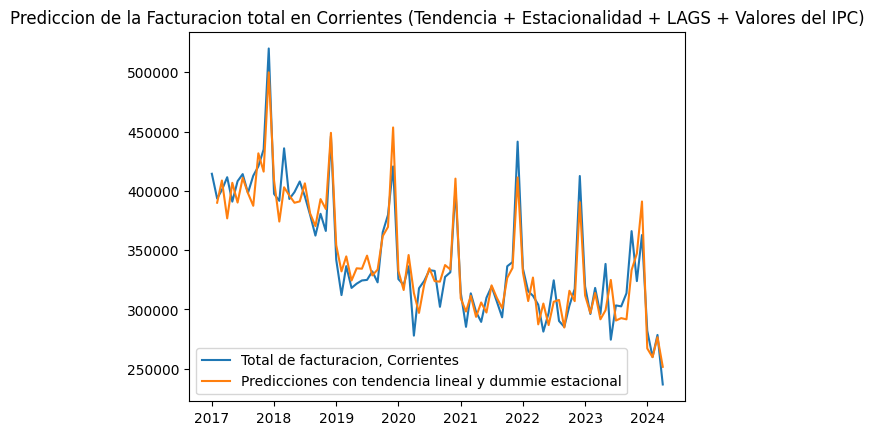

In [36]:
plt.plot(df['total_facturacion'],label = "Total de facturacion, Corrientes")
plt.plot(predicciones,label = "Predicciones con tendencia lineal y dummie estacional")
plt.title("Prediccion de la Facturacion total en Corrientes (Tendencia + Estacionalidad + LAGS + Valores del IPC)")
plt.legend()
plt.show()

Viendo el resultado, vemos que el $R²$ mejoro un 0.01. Ademas de incluir un P valor con una prob. de rechazo muy grande, por ende no lo consideramos relevante